#df_2

##imporing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,model_selection,linear_model,metrics,svm,neighbors,tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

##load csv dataset

In [2]:
df_2 = pd.read_csv("/content/text classification.csv",encoding='latin-1')
df_2

,twitte,class
0,I'm 23 today.,sensitive
1,I'm happy to be 18 years old.,sensitive
2,My birthday is 30 March 1992.,sensitive
3,Guess what? I'm 25 years old.,sensitive
4,Today my daughter is 16 years old.,sensitive
...,...,...
1391,The senior is one of the most decorated male t...,not sensitive
1392,2020 COULD be your year to get moving and chan...,not sensitive
1393,RT @MailSport: 'I thought you liked yellow on ...,not sensitive
1394,RT @BBCSport: ?? \n\nTennis greats played toge...,not sensitive


In [3]:
df_2.shape

(1396, 2)

In [4]:
df_2.isnull().sum()

twitte    0
class     0
dtype: int64

In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   twitte  1396 non-null   object
 1   class   1396 non-null   object
dtypes: object(2)
memory usage: 21.9+ KB


In [6]:
df_2['twitte'].head(10)

0                                        I'm 23 today.
1                        I'm happy to be 18 years old.
2                        My birthday is 30 March 1992.
3                        Guess what? I'm 25 years old.
4                   Today my daughter is 16 years old.
5                Next Monday, get in at the age of 50.
6    Next Friday is my birthday, and I'm 40 years old.
7                          My daughter is 6 years old.
8                             My wife is 36 years old.
9                                    I'm 20 years old.
Name: twitte, dtype: object

##Frac = 1

In [7]:
df_2.sample(frac=1)

,twitte,class
123,My vacation is Tuesday.,sensitive
367,@miller_cricket @AliIftekhar1 @ESPNcricinfo no...,not sensitive
1053,RT @nancylevine: @gregolear Trumps words abou...,not sensitive
766,RT @LymeScience: Did you know that the CDC doc...,not sensitive
509,RT @YGlSFAM: to all my wakanda squads and thos...,not sensitive
...,...,...
245,@daniel86cricket @OfficialSLC i think bcci has...,not sensitive
278,"RT @UmarKhalidJNU: Brilliant, Amazing. \n\nKud...",not sensitive
1093,RT @MSNBC: Michael Flynn files to withdraw his...,not sensitive
411,RT @TBO_Updates: So called a BO website postin...,not sensitive


##show the relationship between class and twitte

Text(0, 0.5, 'twitte')

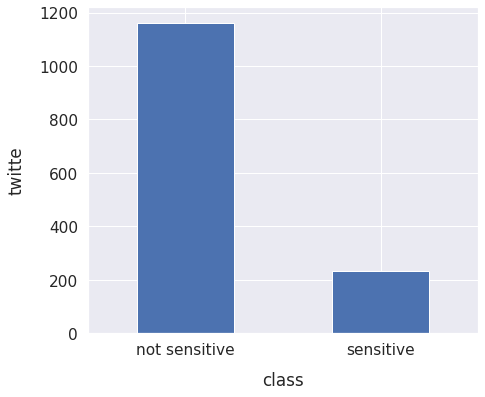

In [8]:
sns.set(font_scale=1.4)
df_2['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("class", labelpad=14)
plt.ylabel("twitte", labelpad=14)

##WordNetLemmatizer

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop_words2 = set(stopwords.words('english'))
print(stop_words2)

{'wouldn', 'what', 'won', 'off', 'ourselves', 'our', 'does', 'needn', 'through', 'was', 'which', 'then', 'to', 'from', 'has', 'in', 'himself', 'couldn', 'is', 'the', 'here', 'should', 'such', 'few', 'him', 'by', 'why', 'll', 'yourselves', 'o', "mustn't", 'weren', 'had', 'd', 'hadn', 'more', "haven't", "that'll", 'ma', 'will', 'own', 'each', "shouldn't", 'into', 'so', 'over', 'below', "won't", 'mustn', "weren't", 'about', "couldn't", 'did', 'doing', "it's", 'doesn', 'didn', 'been', 'yourself', 'again', 'while', 'shouldn', 'herself', 'being', 'an', 'nor', 'than', 'when', 'these', "didn't", "hasn't", 'mightn', 'it', 'hasn', 'am', "you'd", 'she', 'who', 'ours', 'whom', "she's", 're', 'as', 'are', 'with', "isn't", 'after', 'because', 'once', "wasn't", "wouldn't", 'most', 'too', 'we', "needn't", 'i', "mightn't", 'itself', 'or', 'me', 'do', 'for', "doesn't", 'wasn', 'any', 'ain', 'be', "hadn't", 'before', 'y', 'his', 'some', 'a', 'yours', 'were', 'there', 'you', 'those', 'if', 'themselves', '

In [11]:
wordnet = WordNetLemmatizer()

def prepare_twitte(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words2])
  x = x.encode('utf-8').decode()
  x = re.sub(r'https*\S+',' ',x) # URL http
  x = re.sub(r'www.\S+',' ',x) #www.blablaaa
  x = re.sub(r'@\S+',' ',x) # mention 
  x = re.sub(r'#\S+',' ',x) # hashtag 
  x = re.sub(r"\'\w+"," ",x) # stop_words2
  x = re.sub("[%s]" % re.escape(string.punctuation)," ",x) #punctuations
  x = re.sub(r"\w*\d+\w*"," ",x)
  x = re.sub(r"\s{2,}"," ",x)
  return x

In [12]:
df_2['clean_twitte'] = df_2['twitte'].apply(prepare_twitte)
df_2

,twitte,class,clean_twitte
0,I'm 23 today.,sensitive,i today
1,I'm happy to be 18 years old.,sensitive,i happy years old
2,My birthday is 30 March 1992.,sensitive,birthday march
3,Guess what? I'm 25 years old.,sensitive,guess what i years old
4,Today my daughter is 16 years old.,sensitive,today daughter years old
...,...,...,...
1391,The senior is one of the most decorated male t...,not sensitive,senior one decorated male tennis players move ...
1392,2020 COULD be your year to get moving and chan...,not sensitive,could year get moving change lives animals mi...
1393,RT @MailSport: 'I thought you liked yellow on ...,not sensitive,rt thought liked yellow that ok grigor dimitro...
1394,RT @BBCSport: ?? \n\nTennis greats played toge...,not sensitive,rt tennis greats played together raise money a...


In [13]:
df_2['clean_twitte'].tail(30)

1366    rt day tennis world shock australian open dram...
1367    rt days ago deb fighting australian bushfires ...
1368                 tennis australia wrong side history 
1369                might fuck join tennis club something
1370                    cannot serve overhead tennis lob 
1371    adidas stan smith mens size black leather anim...
1372     tennis players australian open issued gas masks 
1373    rt cool tennis came together cause every slam ...
1374    girl could make watch tennis saying even ruine...
1375             thursday tennis picks auckland adelaide 
1376    rt kate way tough stuffies looooovvvveees tenn...
1377    professional tennis players held charity event...
1378    theyre grand slam tennis champions awaiting p...
1379    rt nothing seems change definitely anger manag...
1380    imagine i pursued tennis high school like pe t...
1381    first day board guys vip tennis picks go units...
1382    rt tennis champion showed rarely seen relaxed ...
1383    rt rea

##convert class to be (0,1)

In [14]:
not_sensitive_label,sensitive_label = (0,1)

In [15]:
df_2['class'] = df_2['class'].map({
    'not sensitive': not_sensitive_label,
    'sensitive': sensitive_label
})

In [16]:
df_2['class'].value_counts()

0    1162
1     234
Name: class, dtype: int64

##Vectorizer

In [17]:
vectorization = TfidfVectorizer(stop_words=stop_words2)

In [18]:
df_twitte = vectorization.fit_transform(df_2['clean_twitte'])

##x , y

In [19]:
x2 = df_twitte
x2

<1396x4806 sparse matrix of type '<class 'numpy.float64'>'
	with 12241 stored elements in Compressed Sparse Row format>

In [20]:
y2 = df_2['class'].values
y2

array([1, 1, 1, ..., 0, 0, 0])

##Test algorithms accuracy's score(before fitting)

In [21]:
models = []
models.append(("LR",linear_model.LogisticRegression()))
models.append(("SVM",svm.SVC()))
models.append(("Forest",RandomForestClassifier()))
models.append(("KNN",neighbors.KNeighborsClassifier()))
models.append(("Tree",tree.DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model,x2,y2,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.836429 (0.334945)
SVM: 0.846429 (0.313396)
Forest: 0.865704 (0.268415)
KNN: 0.835000 (0.338431)
Tree: 0.863541 (0.259272)


##split dataset into train and test

In [22]:
x2_train,x2_test,y2_train,y2_test = model_selection.train_test_split(
    x2,y2,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y2)

x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((1047, 4806), (349, 4806), (1047,), (349,))

##Logistic regression 

In [26]:
logistic_model_2 = linear_model.LogisticRegressionCV()
logistic_model_2.fit(x2_train,y2_train)

LogisticRegressionCV()

In [27]:
log_pred2_train = logistic_model_2.predict(x2_train)
log_pred2_test = logistic_model_2.predict(x2_test)

In [28]:
print(f'Training Score: \n{metrics.classification_report(y2_train,log_pred2_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1047
   macro avg       1.00      1.00      1.00      1047
weighted avg       1.00      1.00      1.00      1047



In [29]:
print(f'Testing Score: \n{metrics.classification_report(y2_test,log_pred2_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       291
           1       1.00      0.78      0.87        58

    accuracy                           0.96       349
   macro avg       0.98      0.89      0.93       349
weighted avg       0.96      0.96      0.96       349



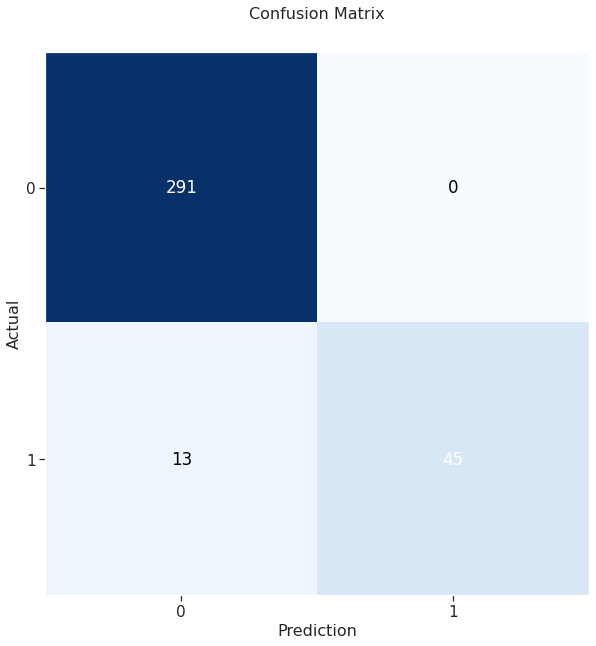

In [30]:
confusion_matrix=metrics.confusion_matrix(y2_test,log_pred2_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##SVM

In [31]:
svm_model_2 = svm.SVC()
svm_model_2.fit(x2_train,y2_train)

SVC()

In [32]:
svm_pred2_train = svm_model_2.predict(x2_train)
svm_pred2_test = svm_model_2.predict(x2_test)

In [33]:
print(f'Training Score: \n{metrics.classification_report(y2_train,svm_pred2_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      0.99      0.99       176

    accuracy                           1.00      1047
   macro avg       1.00      0.99      1.00      1047
weighted avg       1.00      1.00      1.00      1047



In [34]:
print(f'Testing Score: \n{metrics.classification_report(y2_test,svm_pred2_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       291
           1       1.00      0.60      0.75        58

    accuracy                           0.93       349
   macro avg       0.96      0.80      0.86       349
weighted avg       0.94      0.93      0.93       349



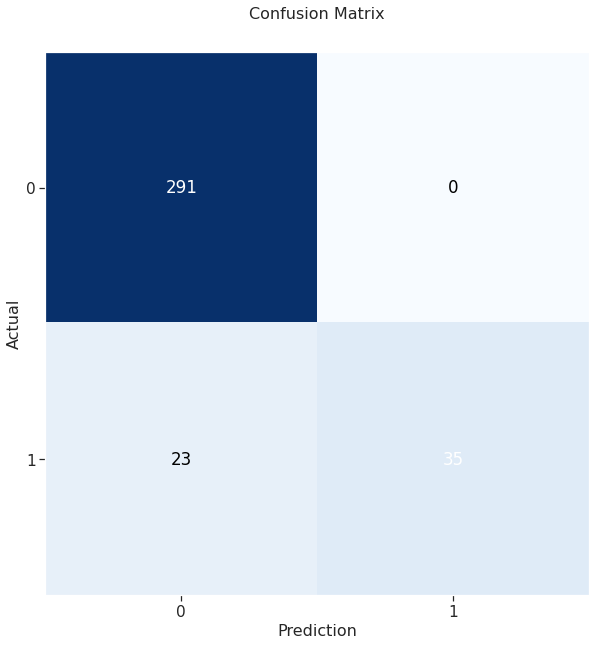

In [35]:
confusion_matrix=metrics.confusion_matrix(y2_test,svm_pred2_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##Random Forest

In [36]:
forest_model_2 = RandomForestClassifier()
forest_model_2.fit(x2_train,y2_train)

RandomForestClassifier()

In [37]:
forest_pred2_train = forest_model_2.predict(x2_train)
forest_pred2_test = forest_model_2.predict(x2_test)

In [38]:
print(f'Training Score: \n{metrics.classification_report(y2_train,forest_pred2_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1047
   macro avg       1.00      1.00      1.00      1047
weighted avg       1.00      1.00      1.00      1047



In [39]:
print(f'Testing Score: \n{metrics.classification_report(y2_test,forest_pred2_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       291
           1       1.00      0.79      0.88        58

    accuracy                           0.97       349
   macro avg       0.98      0.90      0.93       349
weighted avg       0.97      0.97      0.96       349



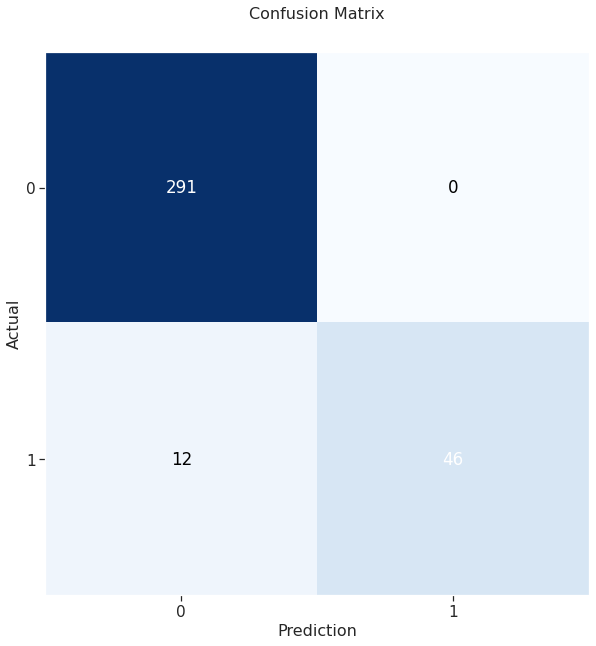

In [40]:
confusion_matrix=metrics.confusion_matrix(y2_test,forest_pred2_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##KNN

In [41]:
knn_model_2 = neighbors.KNeighborsClassifier()
knn_model_2.fit(x2_train,y2_train)

KNeighborsClassifier()

In [42]:
knn_pred2_train = knn_model_2.predict(x2_train)
knn_pred2_test = knn_model_2.predict(x2_test)

In [43]:
print(f'Training Score: \n{metrics.classification_report(y2_train,knn_pred2_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       871
           1       1.00      0.88      0.93       176

    accuracy                           0.98      1047
   macro avg       0.99      0.94      0.96      1047
weighted avg       0.98      0.98      0.98      1047



In [44]:
print(f'Testing Score: \n{metrics.classification_report(y2_test,knn_pred2_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       291
           1       0.84      0.81      0.82        58

    accuracy                           0.94       349
   macro avg       0.90      0.89      0.90       349
weighted avg       0.94      0.94      0.94       349



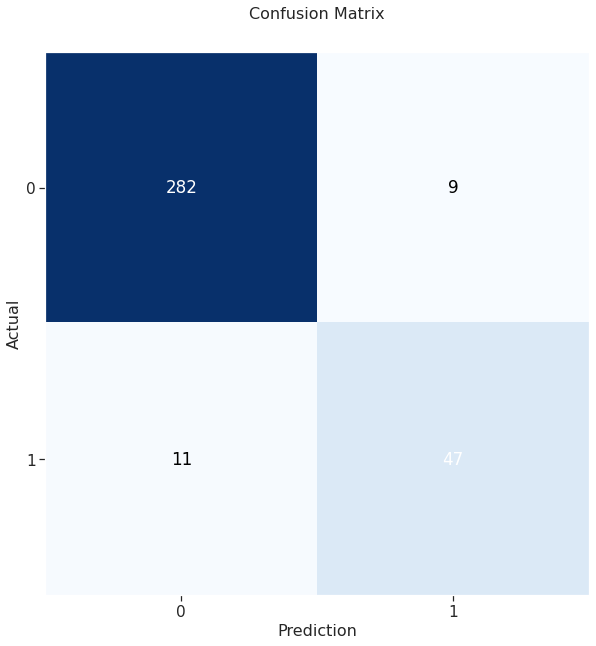

In [45]:
confusion_matrix=metrics.confusion_matrix(y2_test,knn_pred2_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##Tree

In [46]:
tree_model_2 = tree.DecisionTreeClassifier()
tree_model_2.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [47]:
tree_pred2_train = tree_model_2.predict(x2_train)
tree_pred2_test = tree_model_2.predict(x2_test)

In [48]:
print(f'Training Score: \n{metrics.classification_report(y2_train,tree_pred2_train)}')

Training Score: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       871
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1047
   macro avg       1.00      1.00      1.00      1047
weighted avg       1.00      1.00      1.00      1047



In [49]:
print(f'Testing Score: \n{metrics.classification_report(y2_test,tree_pred2_test)}')

Testing Score: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       291
           1       0.98      0.79      0.88        58

    accuracy                           0.96       349
   macro avg       0.97      0.89      0.93       349
weighted avg       0.96      0.96      0.96       349



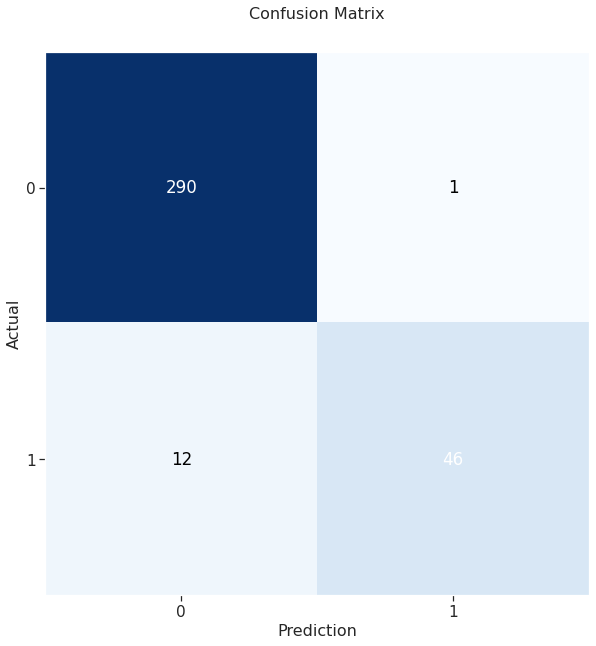

In [50]:
confusion_matrix=metrics.confusion_matrix(y2_test,tree_pred2_test)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(10,10))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

##best model?

**Random Forest** is the best model so i will take it to testing on new data.

##predict new dataset

In [51]:
def output_label_2(n):
  if n == 0:
    return "Not Sensitive"
  elif n == 1:
    return "Sensitive"  

In [54]:
def test_2(news):
  testing_news_2 = {'twitte':[news]}
  news_def_2 = pd.DataFrame(testing_news_2)
  news_def_2['clean_twitte'] = news_def_2['twitte'].apply(prepare_twitte)
  news_x2_test = news_def_2['clean_twitte']
  news_xv2_test = vectorization.transform(news_x2_test)

  forest_pred2_test = forest_model_2.predict(news_xv2_test)

  return print("\n\nPrediction: {}".format(output_label_2(forest_pred2_test)))

In [55]:
news = str(input())
test_2(news)

RT @ElectronicsNews: Smart Cricket Ball measures your bowling performance - The #Sportcor Smartball is the work of a technology start-up an…


Prediction: Not Sensitive


##joblib

In [56]:
from joblib import dump

In [57]:
dump(forest_model_2,"model_2.joblib")
dump(vectorization,"vector_2.joblib")

['vector_2.joblib']